# Konwolucyjne sieci neuronowe

## Convolution neural networks, CNN

# Filtry jako ekstraktory informacji

<img src="Grafika/Filter.png" width="550">

<img src="Grafika/OriginalAndFilter.png" width="550">

<img src="Grafika/FirstPixelMulitiplication.png" width="550">

<img src="Grafika/SecondMultiplication.png" width="550">

Źródło: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/

### Filtrowanie - konwolucja (splot):

<img src="Grafika/matrixConvolution.jpg" width="450">

Źródło: https://i.stack.imgur.com/SKgim.jpga

### Warstwa konwolucyjna

Warstawa konwolucyjna analizuje obraz "kawałek po kawałku" i zwraca informację o poszczególnych obszarach przy użyciu filtrów.

Warstwa konwolucyjna składa się z K filtrów i zwraca K "tablic" powstałych przez przetworzenie wejścia kolejnymi filtrami.

Operacja splotu (konwolucja):

<img src="Grafika/Convolution_schematic.gif" width="450">

Źródło: http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif

### W przypadku macierzy trójwymiarowych, filtrowanie (2D) wygląda tak:

<img src="https://i.stack.imgur.com/FjvuN.gif" width="550">

### Sieć konwolucyjna uczy się ekstrachować istotne "informacje" - parametrami sieci są wagi w filtrach.

Czyli sieć sama uczy się tego, co jest istotne w danych dla naszego celu.

W sieciach konwolucyjnych na wyjście splotu nakłada się funkcję aktywacji. Z reguły jest to ReLU:

<img src="Grafika/relu.png" width="350">

Źródło: https://ml4a.github.io/images/figures/relu.png

Takie przekształcenie można interpretować w następujący sposób: jeżeli w danym obszarze jest coś co dany filtr "rozpoznaje" (wartość splotu większa od 0), to zwracamy po prostu wynik splotu. Natomiast jeśli dane nie pasują do danego filtra (wartość ujemna), to niezaleznie od tego co w tych danych jest, zwracamy 0, które mówi, że nie ma tego czego szukamy.

## Pooling (subsampling)

Pooling to agregacja informacji - zamiast przechowywać całą tablicę, którą zwrócił filtr, wyciągamy sobie po jednej "informacji" z podobszarów. W ten sposób otrzymujemy tablicę o zredukowanym wymiarze.

MaxPooling:

<img src="Grafika/MaxPool.png" width="550">

Źródło: https://adeshpande3.github.io/assets/MaxPool.png

Jaką informację wyekstrahuje "max pooling"?

A jaką "average pooling"?

W praktyce z reguły po każdej warstwie konwolucyjnej daje się max pooling.

### Wielowarstwowa sieć konwolucyjna

Wielowarstwowe sieci konwolucyjne wykorzystują wielokrotne składanie operacji filtrowania i uczą się wykrywać bardzo złożone zależności.

Wówczas każda kolejna warstwa w jakiś sposób agreguje informacje z poprzedniej warstwy do ogólniejszego poziomu. Przykladowa interpretacja w kontekście klasyfikacji czy na danym zdjęciu jest człowiek:
- pierwsza warstwa: rozpoznawianie kształtów/konturów
- druga warstwa: detekcja części ciała
- trzecia: detekcja człowiek


<img src="Grafika/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"

### Wyjście sieci

Ostatnia warsta konwolucyjna (lub pooling) jest rozwijana do wektora. Ten wektor jest przepuszczany przez warstwy dense, które prowadzą do predykcji. Oczywiście można dokonywać predykcji bezpośrednio z rozwiniętego wektora.

### Uwaga. Filtr dla obrazka 2D jest tablicą 2D. Natomiast kolejne warstwy są 3D - dochodzi wymiar liczby filtrów. Dlatego dalsze filtry są kostami 3D, które mają głębokość równą liczbie filtrów w poprzedniej warstwie.

<img src="Grafika/conv3D.jpg" width="700">

Źródło: https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/_jcr_content/mainParsys/image_copy.img.jpg/1497876372993.jpg

Naturalnie, jeżeli na wejściu mamy obiekt więcej niż dwu-wymiarowy to już pierwsza warstwa używa filtrów, które są kostkami.

## Strides - wielkość kroku przesunięcia

Określa dokładność z jaką chcemy skanować dane.

Strides = (1,1)

<img src="Grafika/Stride1.png" width="600">

Strides = (2,2)

<img src="Grafika/Stride2.png" width="600">

Źródło: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/


# Zad

Pobierzmy zbiór danych

http://scikit-learn.org/0.15/auto_examples/applications/face_recognition.html

In [1]:
import tensorflow as tf
from tensorflow import keras as keras
print(tf.__version__)

print(keras.__version__)

2.3.1
2.4.0


In [2]:
import numpy as np
import pandas as pd
import os
from tensorflow.python.keras.utils import np_utils
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names

In [3]:
X[0] # wektor - pozniej zamienimy na macierz, bo to jest obraz

array([254.      , 254.      , 251.66667 , ...,  87.333336,  88.666664,
        86.666664], dtype=float32)

In [4]:
X.shape

(1288, 1850)

In [5]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([ 77, 236, 121, 530, 109,  71, 144], dtype=int64))

In [6]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [7]:
# przygotowanie y
y = np_utils.to_categorical(y)
y[:5]

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
n_classes = y.shape[1]
n_classes

7

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

X_train = np.array([x.reshape((h, w, 1)) for x in X_train])
X_test = np.array([x.reshape((h, w, 1)) for x in X_test])
print(X_train.shape)

(772, 50, 37, 1)


### skalowanie X

In [10]:
# skalowanie X

X_train = X_train/255
X_test = X_test/255

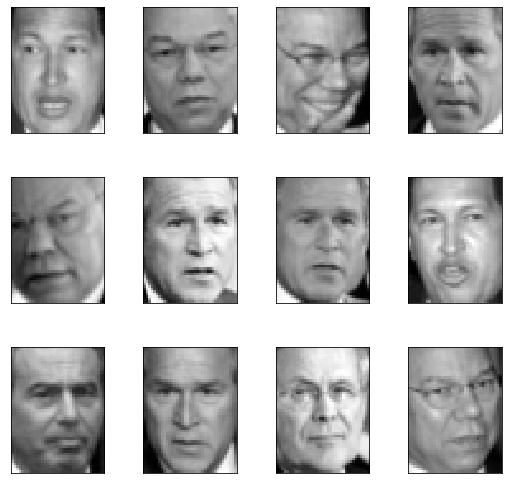

In [11]:
import matplotlib.pyplot as plt

images = X_train[:12]
n_col = 4
n_row = 3
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i][:,:,0], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    
plt.show()

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(772, 50, 37, 1)
(772, 7)
(516, 50, 37, 1)


# Zad. (Punkt odniesienia)

Sprawdź klasyfikację przy użyciu perceptrona - sieć 0-warstwowa (lub 1-warstwową licząc wyjście jako warstwę). Pamiętaj, że, aby uruchomić warstwę dense na danych, które nie są wektorem trzeba je "rozwinąć" przy uzyciu "warstwy" (operacji) Flatten. 

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import History


history_dense_1 = History()
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=20,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_dense_1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1850)              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 12957     
Total params: 12,957
Trainable params: 12,957
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
19/19 [==============================] - 0s 10ms/step - loss: 1.8091 - categorical_accuracy: 0.3627 - val_loss: 1.6908 - val_categorical_accuracy: 0.4093
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 1.6970 - categorical_accuracy: 0.4059 - val_loss: 1.6101 - val_categorical_accuracy: 0.4249
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 1.6042 - categorical_accuracy: 0.4421 - val_loss: 1.5505 - val_categorical_accuracy: 0.4145
Epoch 4/100
19/19 

Epoch 47/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6552 - categorical_accuracy: 0.8256 - val_loss: 0.8561 - val_categorical_accuracy: 0.7202
Epoch 48/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6575 - categorical_accuracy: 0.8187 - val_loss: 0.8835 - val_categorical_accuracy: 0.6839
Epoch 49/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6798 - categorical_accuracy: 0.7876 - val_loss: 0.8501 - val_categorical_accuracy: 0.7461
Epoch 50/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6306 - categorical_accuracy: 0.8307 - val_loss: 0.8215 - val_categorical_accuracy: 0.7254
Epoch 51/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6139 - categorical_accuracy: 0.8618 - val_loss: 0.7664 - val_categorical_accuracy: 0.7668
Epoch 52/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5996 - categorical_accuracy: 0.8566 - val_loss: 0.7868 - val_categorical_accuracy: 0.7513
Epoc

19/19 [==============================] - 0s 2ms/step - loss: 0.3937 - categorical_accuracy: 0.9050 - val_loss: 0.7093 - val_categorical_accuracy: 0.7461
Epoch 97/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4379 - categorical_accuracy: 0.8843 - val_loss: 0.6787 - val_categorical_accuracy: 0.8083
Epoch 98/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3941 - categorical_accuracy: 0.9223 - val_loss: 0.6408 - val_categorical_accuracy: 0.8187
Epoch 99/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3863 - categorical_accuracy: 0.9206 - val_loss: 0.6305 - val_categorical_accuracy: 0.8083
Epoch 100/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4038 - categorical_accuracy: 0.9085 - val_loss: 0.6751 - val_categorical_accuracy: 0.8083


In [14]:
model.evaluate(X_test,y_test)

17/17 [==============================] - 0s 706us/step - loss: 0.7100 - categorical_accuracy: 0.7868


[0.7100268006324768, 0.786821722984314]

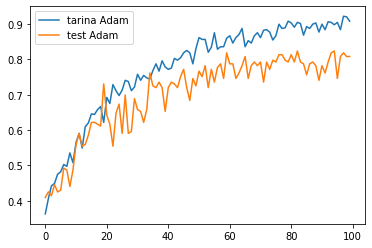

In [15]:
plt.plot(history_dense_1.history['categorical_accuracy'], label = "train Adam")
plt.plot(history_dense_1.history['val_categorical_accuracy'], label = "test Adam")


plt.legend()
plt.show()

# Zad

Sprawdź czy dwie warstwy poprawią wynik?

In [18]:
history_dense_2 = History()
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(100,activation="relu"))
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=20,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_dense_2])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1850)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               185100    
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 707       
Total params: 185,807
Trainable params: 185,807
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
19/19 [==============================] - 0s 8ms/step - loss: 2.1519 - categorical_accuracy: 0.3506 - val_loss: 1.7456 - val_categorical_accuracy: 0.3886
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 1.7092 - categorical_accuracy: 0.4093 - val_loss: 1.7613 - val_categorical_accuracy: 0.3886
Epoch 3/100
19/19 [=============================

Epoch 46/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6998 - categorical_accuracy: 0.7962 - val_loss: 0.8251 - val_categorical_accuracy: 0.7150
Epoch 47/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6929 - categorical_accuracy: 0.7807 - val_loss: 0.8198 - val_categorical_accuracy: 0.7202
Epoch 48/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6988 - categorical_accuracy: 0.7737 - val_loss: 0.8072 - val_categorical_accuracy: 0.7668
Epoch 49/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6563 - categorical_accuracy: 0.8204 - val_loss: 0.8018 - val_categorical_accuracy: 0.7098
Epoch 50/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6571 - categorical_accuracy: 0.7962 - val_loss: 0.8580 - val_categorical_accuracy: 0.7047
Epoch 51/100
19/19 [==============================] - 0s 2ms/step - loss: 0.7146 - categorical_accuracy: 0.7651 - val_loss: 0.8921 - val_categorical_accuracy: 0.7150
Epoc

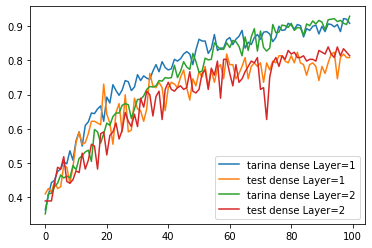

In [19]:
plt.plot(history_dense_1.history['categorical_accuracy'], label = "train dense Layer=1")
plt.plot(history_dense_1.history['val_categorical_accuracy'], label = "test dense Layer=1")

plt.plot(history_dense_2.history['categorical_accuracy'], label = "train dense Layer=2")
plt.plot(history_dense_2.history['val_categorical_accuracy'], label = "test dense Layer=2")


plt.legend()
plt.show()

# Sieci konwolucyjne

# Zad
Zbuduj sieć konwolucyjną z jedną warstwą 
* Conv2D

In [20]:
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D

In [21]:
history_conv_1 = History()
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_conv_1])
model.evaluate(X_test,y_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 35, 16)        160       
_________________________________________________________________
flatten_3 (Flatten)          (None, 26880)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 188167    
Total params: 188,327
Trainable params: 188,327
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
19/19 [==============================] - 0s 22ms/step - loss: 2.6557 - categorical_accuracy: 0.2539 - val_loss: 1.8733 - val_categorical_accuracy: 0.3886
Epoch 2/100
19/19 [==============================] - 0s 12ms/step - loss: 1.6770 - categorical_accuracy: 0.4180 - val_loss: 1.6070 - val_categorical_accuracy: 0.3938
Epoch 3/100
19/19 [===========================

[0.7836026549339294, 0.7810077667236328]

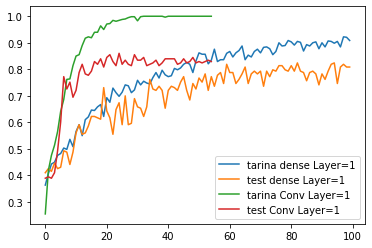

In [22]:
plt.plot(history_dense_1.history['categorical_accuracy'], label = "train dense Layer=1")
plt.plot(history_dense_1.history['val_categorical_accuracy'], label = "test dense Layer=1")

# plt.plot(history_dense_2.history['categorical_accuracy'], label = "tarina dense Layer=2")
# plt.plot(history_dense_2.history['val_categorical_accuracy'], label = "test dense Layer=2")

plt.plot(history_conv_1.history['categorical_accuracy'], label = "train Conv Layer=1")
plt.plot(history_conv_1.history['val_categorical_accuracy'], label = "test Conv Layer=1")

plt.legend()
plt.show()

# Zad
Zbuduj sieć konwolucyjną z jedną warstwą 
* Conv2D
* MaxPooling2D

In [23]:
history_conv_max_1 = History()
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_conv_max_1])
model.evaluate(X_test,y_test)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 35, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 17, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6528)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 45703     
Total params: 45,863
Trainable params: 45,863
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
19/19 [==============================] - 0s 23ms/step - loss: 1.7453 - categorical_accuracy: 0.3921 - val_loss: 1.8538 - val_categorical_accuracy: 0.3886
Epoch 2/100
19/19 [==============================] - 0s 11ms/step - loss: 1.6889 -

Epoch 45/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0889 - categorical_accuracy: 0.9948 - val_loss: 0.5318 - val_categorical_accuracy: 0.8238
Epoch 46/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0907 - categorical_accuracy: 0.9931 - val_loss: 0.5001 - val_categorical_accuracy: 0.8497
Epoch 47/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0885 - categorical_accuracy: 0.9948 - val_loss: 0.5156 - val_categorical_accuracy: 0.8446
Epoch 48/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0762 - categorical_accuracy: 0.9983 - val_loss: 0.5118 - val_categorical_accuracy: 0.8446
Epoch 49/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0787 - categorical_accuracy: 0.9965 - val_loss: 0.4879 - val_categorical_accuracy: 0.8497
Epoch 50/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0711 - categorical_accuracy: 1.0000 - val_loss: 0.5062 - val_categorical_accuracy: 0.844

[0.6756947040557861, 0.815891444683075]

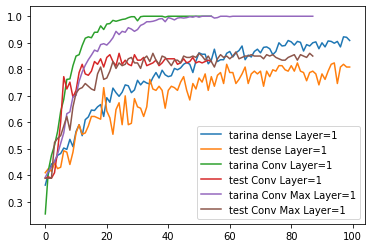

In [24]:
plt.plot(history_dense_1.history['categorical_accuracy'], label = "train dense Layer=1")
plt.plot(history_dense_1.history['val_categorical_accuracy'], label = "test dense Layer=1")

# plt.plot(history_dense_2.history['categorical_accuracy'], label = "tarina dense Layer=2")
# plt.plot(history_dense_2.history['val_categorical_accuracy'], label = "test dense Layer=2")

plt.plot(history_conv_1.history['categorical_accuracy'], label = "train Conv Layer=1")
plt.plot(history_conv_1.history['val_categorical_accuracy'], label = "test Conv Layer=1")

plt.plot(history_conv_max_1.history['categorical_accuracy'], label = "train Conv Max Layer=1")
plt.plot(history_conv_max_1.history['val_categorical_accuracy'], label = "test Conv Max Layer=1")

plt.legend()
plt.show()

# Zad
Zbuduj sieć konwolucyjną z jedną warstwą 
* Conv2D (,padding="same")
* MaxPooling2D

In [25]:
history_conv_max_1 = History()
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=X_train.shape[1:], padding="same"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_conv_max_1])
model.evaluate(X_test,y_test)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 50, 37, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 18, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 50407     
Total params: 50,567
Trainable params: 50,567
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
19/19 [==============================] - 0s 18ms/step - loss: 1.8217 - categorical_accuracy: 0.3351 - val_loss: 1.7185 - val_categorical_accuracy: 0.3886
Epoch 2/100
19/19 [==============================] - 0s 13ms/step - loss: 1.6882 -

Epoch 45/100
19/19 [==============================] - 0s 12ms/step - loss: 0.1169 - categorical_accuracy: 0.9793 - val_loss: 0.5352 - val_categorical_accuracy: 0.8290
Epoch 46/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0936 - categorical_accuracy: 0.9896 - val_loss: 0.5321 - val_categorical_accuracy: 0.8290
Epoch 47/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0848 - categorical_accuracy: 0.9948 - val_loss: 0.5513 - val_categorical_accuracy: 0.8342
Epoch 48/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0785 - categorical_accuracy: 0.9983 - val_loss: 0.5704 - val_categorical_accuracy: 0.8031
Epoch 49/100
19/19 [==============================] - 0s 13ms/step - loss: 0.1010 - categorical_accuracy: 0.9879 - val_loss: 0.5546 - val_categorical_accuracy: 0.8083
Epoch 50/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0800 - categorical_accuracy: 0.9914 - val_loss: 0.4941 - val_categorical_accuracy: 0.844

[0.6473985314369202, 0.819767415523529]

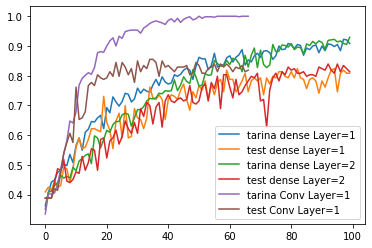

In [26]:
plt.plot(history_dense_1.history['categorical_accuracy'], label = "train dense Layer=1")
plt.plot(history_dense_1.history['val_categorical_accuracy'], label = "test dense Layer=1")

plt.plot(history_dense_2.history['categorical_accuracy'], label = "train dense Layer=2")
plt.plot(history_dense_2.history['val_categorical_accuracy'], label = "test dense Layer=2")

plt.plot(history_conv_max_1.history['categorical_accuracy'], label = "train Conv Layer=1")
plt.plot(history_conv_max_1.history['val_categorical_accuracy'], label = "test Conv Layer=1")

plt.legend()
plt.show()

# Zad
Zbuduj sieć konwolucyjną z jedną warstwą 
* Conv2D (,padding="same")
* MaxPooling2D
* Conv2D (,padding="same")
* MaxPooling2D

In [27]:
history_conv_max_2 = History()
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=X_train.shape[1:],padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(16,(2,2),padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_conv_max_2])
model.evaluate(X_test,y_test)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 37, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 18, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 18, 16)        2064      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 9, 16)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1728)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 12103     
Total params: 14,487
Trainable params: 14,487
Non-trainable params: 0
__________________________________________________

Epoch 43/100
19/19 [==============================] - 1s 28ms/step - loss: 0.0246 - categorical_accuracy: 1.0000 - val_loss: 0.5208 - val_categorical_accuracy: 0.8653
Epoch 44/100
19/19 [==============================] - 1s 39ms/step - loss: 0.0224 - categorical_accuracy: 1.0000 - val_loss: 0.5394 - val_categorical_accuracy: 0.8705
Epoch 45/100
19/19 [==============================] - 1s 33ms/step - loss: 0.0188 - categorical_accuracy: 1.0000 - val_loss: 0.5384 - val_categorical_accuracy: 0.8549
Epoch 46/100
19/19 [==============================] - 1s 32ms/step - loss: 0.0184 - categorical_accuracy: 1.0000 - val_loss: 0.5590 - val_categorical_accuracy: 0.8653
Epoch 47/100
19/19 [==============================] - 1s 35ms/step - loss: 0.0165 - categorical_accuracy: 1.0000 - val_loss: 0.5488 - val_categorical_accuracy: 0.8549
Epoch 48/100
19/19 [==============================] - 1s 30ms/step - loss: 0.0160 - categorical_accuracy: 1.0000 - val_loss: 0.5977 - val_categorical_accuracy: 0.860

[0.7245737314224243, 0.8391472697257996]

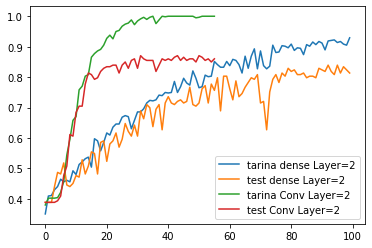

In [28]:
# plt.plot(history_dense_1.history['categorical_accuracy'], label = "tarina dense Layer=1")
# plt.plot(history_dense_1.history['val_categorical_accuracy'], label = "test dense Layer=1")

plt.plot(history_dense_2.history['categorical_accuracy'], label = "train dense Layer=2")
plt.plot(history_dense_2.history['val_categorical_accuracy'], label = "test dense Layer=2")

# plt.plot(history_conv_max_1.history['categorical_accuracy'], label = "tarina Conv Layer=1")
# plt.plot(history_conv_max_1.history['val_categorical_accuracy'], label = "test Conv Layer=1")

plt.plot(history_conv_max_2.history['categorical_accuracy'], label = "train Conv Layer=2")
plt.plot(history_conv_max_2.history['val_categorical_accuracy'], label = "test Conv Layer=2")

plt.legend()
plt.show()

# Zad.

Dodaj: 

* BatchNormalization
* Dropout

```python
model.add(layers.Conv2D(64, (3, 3), ...))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
```

* Dropout can be used after convolutional layers (e.g. Conv2D) and after pooling layers (e.g. MaxPooling2D).
* Often, dropout is only used after the pooling layers, but this is just a rough heuristic.

In [29]:
history_conv_max_2_b = History()
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=X_train.shape[1:],padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(16,(2,2),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_conv_max_2_b])
model.evaluate(X_test,y_test)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 50, 37, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 37, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 50, 37, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 18, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 18, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 18, 16)        2064      
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 18, 16)       

19/19 [==============================] - 4s 220ms/step - loss: 0.0204 - categorical_accuracy: 0.9948 - val_loss: 0.4250 - val_categorical_accuracy: 0.8601
Epoch 87/100
19/19 [==============================] - 2s 90ms/step - loss: 0.0224 - categorical_accuracy: 0.9965 - val_loss: 0.4579 - val_categorical_accuracy: 0.8705
Epoch 88/100
19/19 [==============================] - 2s 117ms/step - loss: 0.0723 - categorical_accuracy: 0.9741 - val_loss: 0.5665 - val_categorical_accuracy: 0.7927
Epoch 89/100
19/19 [==============================] - 3s 146ms/step - loss: 0.0554 - categorical_accuracy: 0.9845 - val_loss: 0.4090 - val_categorical_accuracy: 0.8808
Epoch 90/100
19/19 [==============================] - 2s 92ms/step - loss: 0.0354 - categorical_accuracy: 0.9914 - val_loss: 0.4567 - val_categorical_accuracy: 0.8705
Epoch 91/100
19/19 [==============================] - 5s 245ms/step - loss: 0.0218 - categorical_accuracy: 0.9983 - val_loss: 0.4386 - val_categorical_accuracy: 0.8756
Epoch 9

[0.42609402537345886, 0.8624030947685242]

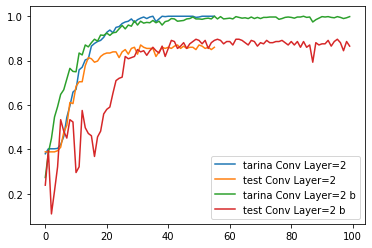

In [30]:
plt.plot(history_conv_max_2.history['categorical_accuracy'], label = "train Conv Layer=2")
plt.plot(history_conv_max_2.history['val_categorical_accuracy'], label = "test Conv Layer=2")

plt.plot(history_conv_max_2_b.history['categorical_accuracy'], label = "train Conv Layer=2 b")
plt.plot(history_conv_max_2_b.history['val_categorical_accuracy'], label = "test Conv Layer=2 b")

plt.legend()
plt.show()